<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# DBSCAN vs. K-Means

_Author: Katie Sylvia_
 
 In **Unsupervised Learning** we have different type of algorithms such as:
 
1. Clustering
2. PCA
2. Association Rules
3. Recommendation Engines


In **Clustering** we have talked about:
1. K-Means Clustering
2. DBSCAN Clustering

In this notebook, we will mainly discuss *DBSCAN Clustering*

As you recall from yesterday, there are some disadvantages in K-Means Clustering. Among them are that K-Means is sensitive to outliers and does not perform well with non-spherical shapes of clusters.
   
   To deal with this we have *Density Based Spatial Clustering (DBSCAN)*:
   
     - It is mainly used to find outliers and to deal with non-spherical data
     - Clustering is mainly done based on density of data points (where more number of data points are present).


In [2]:
# Something new to install...
#! pip install plotly

In [3]:
# Standard imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Something new to import...
import plotly.express as px

# Imports from sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.cluster import DBSCAN, KMeans

import os

# Setting formatting of floats to be five places past the decimal
pd.options.display.float_format = '{:.5f}'.format

os.environ['LOKY_MAX_CPU_COUNT'] = '8'

### I. Get Data Ready

In [5]:
# From Plotly, we'll import the Gapminder data
df = px.data.gapminder()

In [6]:
# Head
df.head()

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
0,Afghanistan,Asia,1952,28.80100,8425333,779.44531,AFG,4
1,Afghanistan,Asia,1957,30.33200,9240934,820.85303,AFG,4
2,Afghanistan,Asia,1962,31.99700,10267083,853.10071,AFG,4
3,Afghanistan,Asia,1967,34.02000,11537966,836.19714,AFG,4
4,Afghanistan,Asia,1972,36.08800,13079460,739.98111,AFG,4


In [7]:
# Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1704 entries, 0 to 1703
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   country    1704 non-null   object 
 1   continent  1704 non-null   object 
 2   year       1704 non-null   int64  
 3   lifeExp    1704 non-null   float64
 4   pop        1704 non-null   int64  
 5   gdpPercap  1704 non-null   float64
 6   iso_alpha  1704 non-null   object 
 7   iso_num    1704 non-null   int64  
dtypes: float64(2), int64(3), object(3)
memory usage: 106.6+ KB


In [8]:
# Nulls
df.isnull().sum()

country      0
continent    0
year         0
lifeExp      0
pop          0
gdpPercap    0
iso_alpha    0
iso_num      0
dtype: int64

In [9]:
# Filter Data to Most Recent Year
df = df[df['year'] == df['year'].max()]

In [10]:
# Set Country to Index
df.set_index('country', inplace=True)

In [11]:
# Drop `iso_alpha`, `year`, and `iso_num`
df = df.drop(columns=['iso_alpha', 'year', 'iso_num'])

In [12]:
# How many countries in each continent?
df.groupby('continent').size()

continent
Africa      52
Americas    25
Asia        33
Europe      30
Oceania      2
dtype: int64

In [13]:
# Get dummies!

dummy_df = pd.get_dummies(df, drop_first=True)

In [14]:
# Head (again!)

dummy_df.head()

,lifeExp,pop,gdpPercap,continent_Americas,continent_Asia,continent_Europe,continent_Oceania
country,,,,,,,
Afghanistan,43.82800,31889923,974.58034,False,True,False,False
Albania,76.42300,3600523,5937.02953,False,False,True,False
Algeria,72.30100,33333216,6223.36747,False,False,False,False
Angola,42.73100,12420476,4797.23127,False,False,False,False
Argentina,75.32000,40301927,12779.37964,True,False,False,False


In [15]:
# Define X

X = dummy_df.copy()

In [16]:
# Scale Features

# initialize scaler
sc = StandardScaler()

X_sc = sc.fit_transform(X)

### II. K-Means Clustering Model

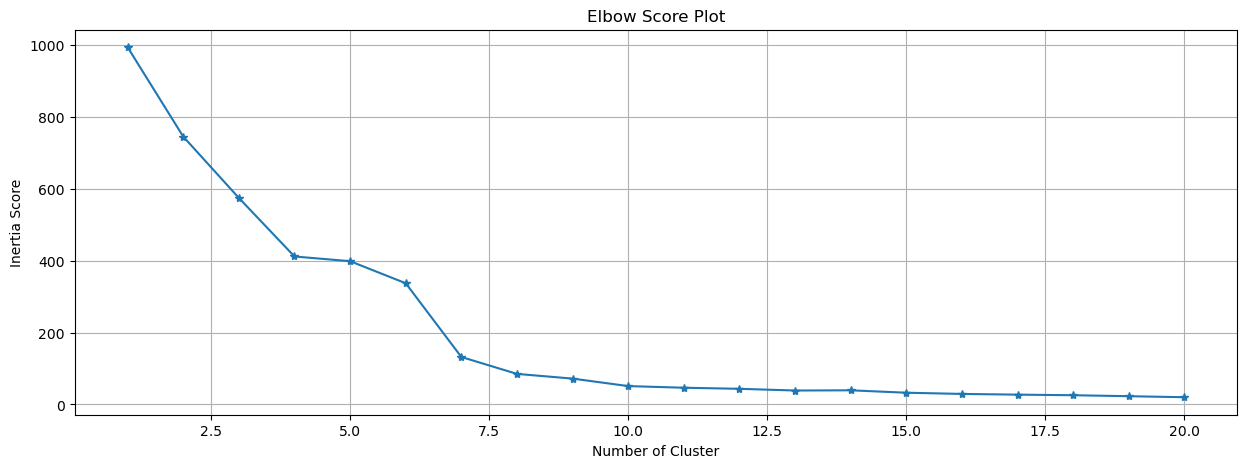

In [18]:
# Elbow Plot

inertia_list = []

for k in range(1, 21):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_sc)
    inertia_list.append(kmeans.inertia_)

# plot elbow graph
plt.figure(figsize=(15, 5))
plt.plot(range(1, 21), inertia_list, marker='*')
plt.title('Elbow Score Plot')
plt.xlabel('Number of Cluster')
plt.ylabel('Inertia Score')
plt.grid(True)
plt.show();

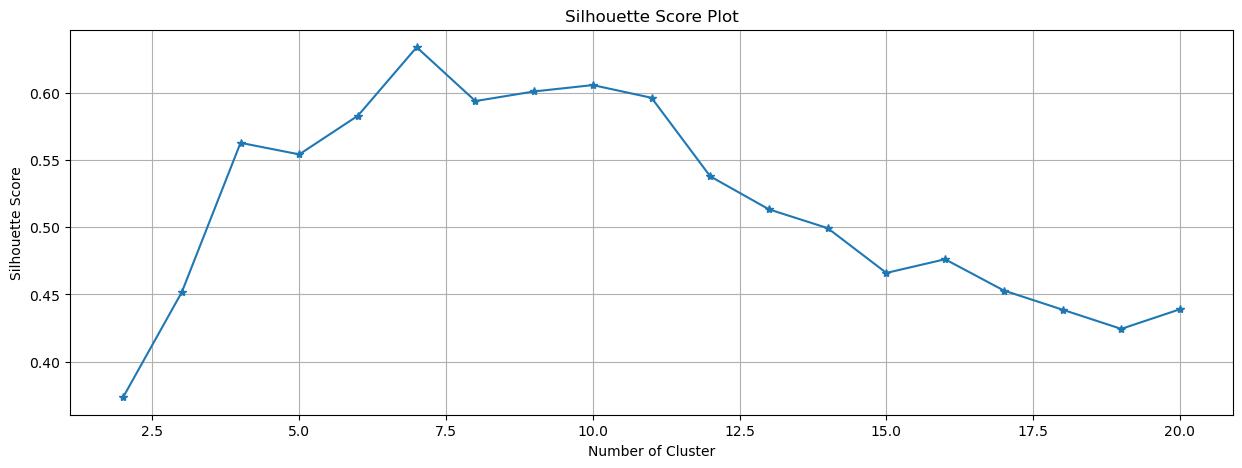

In [19]:
# Silhouette Score

silhouette_list = []

for k in range(2, 21):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_sc)
    labels = kmeans.labels_
    silhouette = silhouette_score(X_sc, labels)
    silhouette_list.append(silhouette)

# plot silhouette graph
plt.figure(figsize=(15, 5))
plt.plot(range(2, 21), silhouette_list, marker='*')
plt.title('Silhouette Score Plot')
plt.xlabel('Number of Cluster')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show();

#### Based off of our metrics above, which k should we try first?

The optimal number of clusters, K=`7`, was determined by analyzing the elbow point in the inertia plot and the peak in the silhouette score.

In [22]:
# Now let's try it!

# Instantiate & Fit
kmeans = KMeans(n_clusters=7, random_state=42)
kmeans.fit(X_sc)

KMeans(n_clusters=7, random_state=42)

In [23]:
# Silhouette Score
# get labels
labels = kmeans.labels_

silhouette = silhouette_score(X_sc, labels)
round(silhouette, 4)

0.6337

#### Visualize Your Clusters!

In [25]:
# Add cluster column

X['cluster'] = labels
centroids = pd.DataFrame(sc.inverse_transform(kmeans.cluster_centers_), \
                         columns=dummy_df.columns)

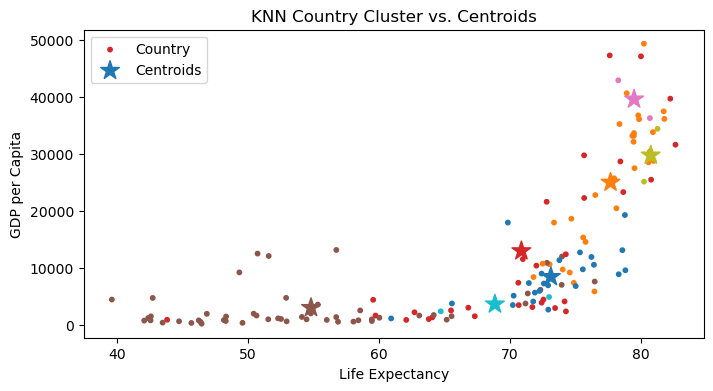

In [26]:
# Method 1: Pairplots/Scatterplots

# set size
plt.figure(figsize=(8, 4))

# plot country data
plt.scatter(x=X['lifeExp'], y=X['gdpPercap'], c=X['cluster'], cmap='tab10', 
            s=10, label='Country')

# plot centroids
plt.scatter(x=centroids['lifeExp'], y=centroids['gdpPercap'], c=centroids.index, 
            cmap='tab10', s=200, marker='*', label='Centroids')
# set title
plt.xlabel('Life Expectancy')
plt.ylabel('GDP per Capita')
plt.title('KNN Country Cluster vs. Centroids')
plt.legend()
plt.show();

In [27]:
# Method 2: Groupby

group_clusters = X.groupby('cluster')

#### An Even Closer Look...Which countries are in each of these clusters?

In [29]:
# For loop

for cluster, group_df in group_clusters:
    print(f'Cluster {cluster}')
    print(', '.join([n for n in group_df.index]))
    print()

Cluster 0
Argentina, Bolivia, Brazil, Chile, Colombia, Costa Rica, Cuba, Dominican Republic, Ecuador, El Salvador, Guatemala, Haiti, Honduras, Jamaica, Mexico, Nicaragua, Panama, Paraguay, Peru, Puerto Rico, Trinidad and Tobago, Uruguay, Venezuela

Cluster 1
Albania, Austria, Belgium, Bosnia and Herzegovina, Bulgaria, Croatia, Czech Republic, Denmark, Finland, France, Germany, Greece, Hungary, Iceland, Ireland, Italy, Montenegro, Netherlands, Norway, Poland, Portugal, Romania, Serbia, Slovak Republic, Slovenia, Spain, Sweden, Switzerland, Turkey, United Kingdom

Cluster 2
Afghanistan, Bahrain, Bangladesh, Cambodia, Hong Kong, China, Indonesia, Iran, Iraq, Israel, Japan, Jordan, Korea, Dem. Rep., Korea, Rep., Kuwait, Lebanon, Malaysia, Mongolia, Myanmar, Nepal, Oman, Pakistan, Philippines, Saudi Arabia, Singapore, Sri Lanka, Syria, Taiwan, Thailand, Vietnam, West Bank and Gaza, Yemen, Rep.

Cluster 3
Algeria, Angola, Benin, Botswana, Burkina Faso, Burundi, Cameroon, Central African Repu

### III. [In Groups] DBSCAN Clustering Model

- Try tuning your parameters
- Visualize your clusters
- Determine your best silhouette score
- Is this better or worse than KMeans?
- Which countries are in each cluster?

In [31]:
# initial model
dbscan = DBSCAN()

# train model
dbscan.fit(X_sc)

DBSCAN()

In [32]:
# set cluster
X['cluster'] = dbscan.labels_

In [33]:
# create DBSCAN plot function
def plot_dbscan(X):
    # get color map
    cm = plt.get_cmap('tab10')
    
    plt.figure(figsize=(8, 4))
    # plot data point
    plt.scatter(x=X['lifeExp'], y=X['gdpPercap'], c=[cm(c) if c > -1 else 'grey' for c in X['cluster']],
                s=20, label='Country')
    # set title
    plt.xlabel('Life Expectancy')
    plt.ylabel('GDP per Capita')
    plt.title('DBSCAN Country Cluster')
    plt.legend()
    plt.show();

##### Visualize your clusters

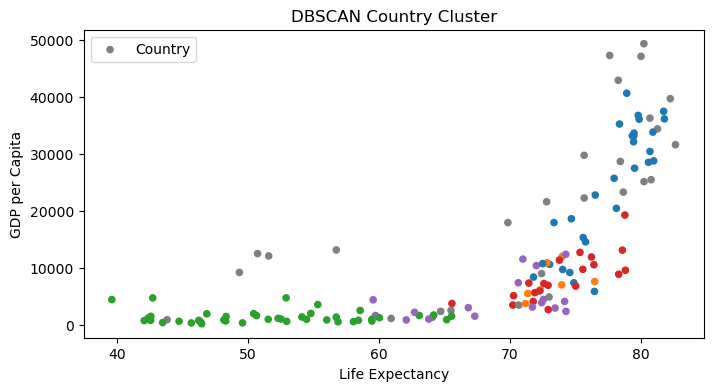

In [35]:
plot_dbscan(X)

##### Determine your best silhouette score

In [37]:
# initialize values
best_params = {
    'score': -1,
    'eps': None,
    'min_samples': None,
    'model': None,
    'model': None
}

# define search parameters
eps = [0.5, 1, 1.5, 2, 2.5]
min_samples = range(2, 11)

# loop through parameters
for ep in eps:
    for min_sample in min_samples:
        dbs = DBSCAN(eps=ep, min_samples=min_sample)
        clusters = dbs.fit_predict(X_sc)
        # skip if not cluster found
        if len(set(clusters)) < 2:
            continue
        score = silhouette_score(X_sc, dbs.labels_)
        # store param for best score
        if score > best_params['score']:
            best_params['eps'] = ep
            best_params['min_samples'] = min_sample
            best_params['model'] = dbs
            best_params['score'] = score

In [38]:
# show best parameters
print(f'Best Silhouette Score: {best_params["score"]:.4f}')
print(f'Best epsilon: {best_params["eps"]}')
print(f'Best min_samples: {best_params["min_samples"]}')
dbs = best_params['model']

Best Silhouette Score: 0.6351
Best epsilon: 2
Best min_samples: 2


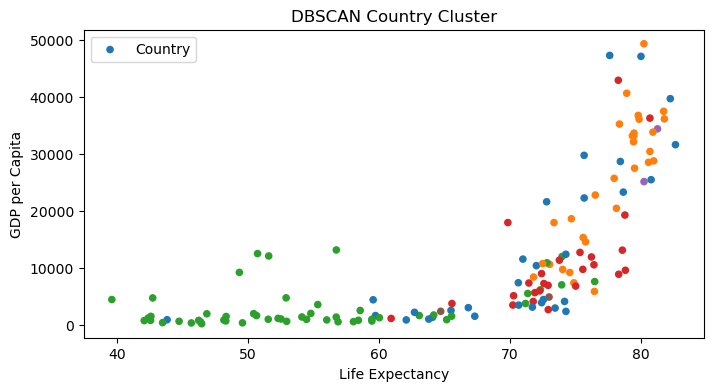

In [39]:
# set cluster value
X['cluster'] = dbs.labels_

# plot graph
plot_dbscan(X)

##### Is this better or worse than KMeans?

In [41]:
# get KMeans score
kmeans_score = silhouette_score(X_sc, kmeans.labels_)

# get DBSCAN score
dbs_score = silhouette_score(X_sc, dbs.labels_)

if dbs_score > kmeans_score:
    print(f'DBSCAN score ({dbs_score:.4f}) better than KMeans score ({kmeans_score:.4f})')
else:
    print(f'KMeans score ({kmeans_score:.4f}) better than DBSCAN score ({dbs_score:.4f})')

DBSCAN score (0.6351) better than KMeans score (0.6337)


In [42]:
group_clusters = X.groupby('cluster')

for cluster, group_df in group_clusters:
    print(f'Cluster {cluster}')
    print(', '.join([n for n in group_df.index]))
    print()

Cluster 0
Afghanistan, Bahrain, Bangladesh, Cambodia, Hong Kong, China, Indonesia, Iran, Iraq, Israel, Japan, Jordan, Korea, Dem. Rep., Korea, Rep., Kuwait, Lebanon, Malaysia, Mongolia, Myanmar, Nepal, Oman, Pakistan, Philippines, Saudi Arabia, Singapore, Sri Lanka, Syria, Taiwan, Thailand, Vietnam, West Bank and Gaza, Yemen, Rep.

Cluster 1
Albania, Austria, Belgium, Bosnia and Herzegovina, Bulgaria, Croatia, Czech Republic, Denmark, Finland, France, Germany, Greece, Hungary, Iceland, Ireland, Italy, Montenegro, Netherlands, Norway, Poland, Portugal, Romania, Serbia, Slovak Republic, Slovenia, Spain, Sweden, Switzerland, Turkey, United Kingdom

Cluster 2
Algeria, Angola, Benin, Botswana, Burkina Faso, Burundi, Cameroon, Central African Republic, Chad, Comoros, Congo, Dem. Rep., Congo, Rep., Cote d'Ivoire, Djibouti, Egypt, Equatorial Guinea, Eritrea, Ethiopia, Gabon, Gambia, Ghana, Guinea, Guinea-Bissau, Kenya, Lesotho, Liberia, Libya, Madagascar, Malawi, Mali, Mauritania, Mauritius, M

### ⭐ There are pros & cons for both DBSCAN and K-Means Clustering Models. Again, since this is unsupervised it is not easy to know which method you should use until you dive into your data! Keep exploring and diving into your data 💫 